In [ ]:
What are the average sales of each game genre among differing Regions?

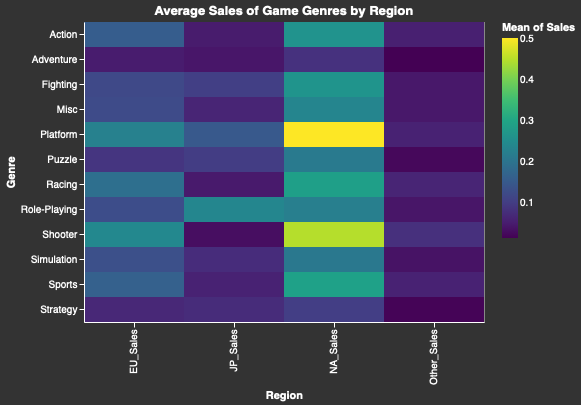

In [37]:
import pandas as pd
import altair as alt
from IPython.display import display


df = pd.read_csv("Video_Games.csv")


sales_columns = ['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']
subset_df = df[['Genre'] + sales_columns]


subset_df = subset_df.dropna()


melted_df = pd.melt(subset_df, id_vars=['Genre'], value_vars=sales_columns, var_name='Region', value_name='Sales')


alt_heatmap = alt.Chart(melted_df).mark_rect().encode(
    x='Region:N',
    y='Genre:N',
    color=alt.Color('mean(Sales):Q', scale=alt.Scale(scheme='viridis')),
    tooltip=['Region:N', 'Genre:N', alt.Tooltip('mean(Sales):Q', title='Average Sales')]
).properties(
    title='Average Sales of Game Genres by Region ',
    width=400,
    height=300
)


display(alt_heatmap)


In [ ]:
Boxplot of a Critic Score per Genre (Which genre is the most popular among Game Critics?)

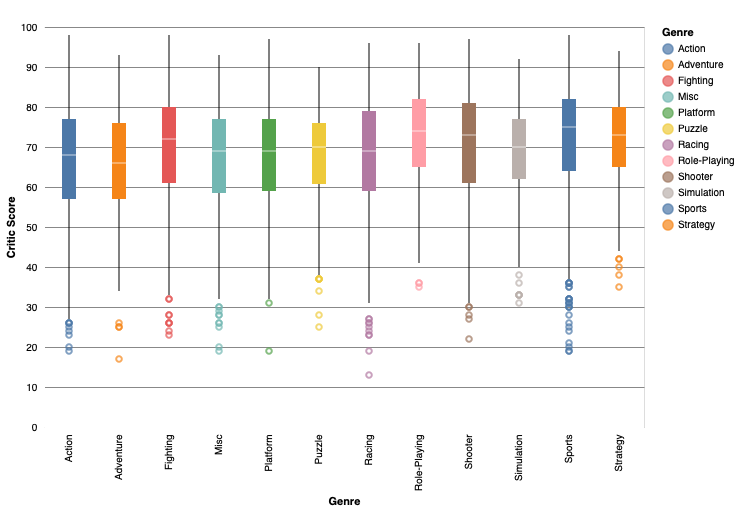

In [4]:
import pandas as pd
import altair as alt
import altair as alt


alt.data_transformers.enable("vegafusion")

alt.renderers.enable('mimetype')

df = pd.read_csv("Video_Games.csv")

alt_boxplot = alt.Chart(df).mark_boxplot().encode(
    x=alt.X('Genre:N', title='Genre'),
    y=alt.Y('Critic_Score:Q', title='Critic Score'),
    color=alt.Color('Genre:N', title='Genre'),
    tooltip=['Genre:N', 'Critic_Score:Q']
).properties(
    width=600,
    height=400,
    title='Critic Scores by Genre '
).configure_axis(
    labelColor='black',  
    titleColor='black'  
).configure_legend(
    labelColor='black',  
    titleColor='black'   
).configure_title(
    color='black'       
).interactive()

alt_boxplot




In [ ]:
Whare the the User Scores for each genre vs the Critic Score?

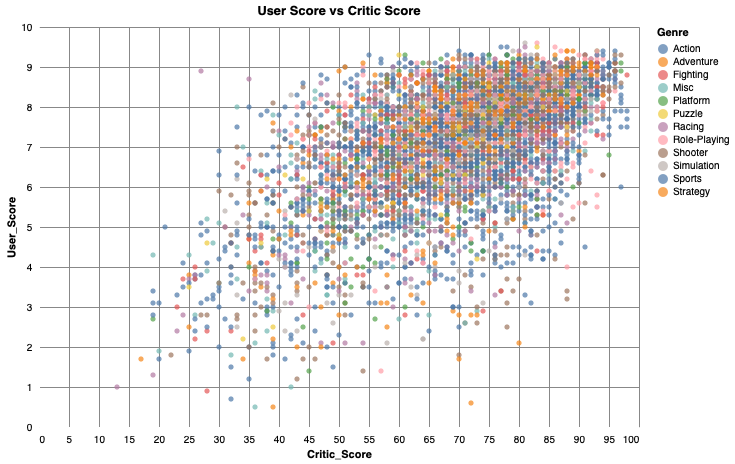

In [14]:
import pandas as pd
import altair as alt

df = pd.read_csv("Video_Games.csv")

df_cleaned = df.dropna(subset=['User_Score', 'Critic_Score'])

scatter_plot = alt.Chart(df_cleaned).mark_circle().encode(
    x='Critic_Score:Q',
    y='User_Score:Q',
    color='Genre:N',
    tooltip=['Name:N', 'Critic_Score:Q', 'User_Score:Q', 'Genre:N']
).properties(
    title=alt.TitleParams('User Score vs Critic Score', color='black'),  
    width=600,
    height=400
).configure_axis(
    labelColor='black',  
    titleColor='black'  
).configure_legend(
    labelColor='black',  
    titleColor='black'   
).configure_title(
    color='black'      
).configure_text(
    color='black'       
).interactive()

scatter_plot



In [19]:
import pandas as pd
import altair as alt


df = pd.read_csv("Video_Games.csv")


df_filtered = df[(df['Year_of_Release'] >= 1992) & (df['Year_of_Release'] <= 2020)]


publisher_sales = df_filtered.groupby(['Publisher', 'Year_of_Release'])['Global_Sales'].sum().reset_index()


top_publishers = publisher_sales.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index


top_publishers_data = publisher_sales[publisher_sales['Publisher'].isin(top_publishers)]


line_chart = alt.Chart(top_publishers_data).mark_line().encode(
    x=alt.X('Year_of_Release:N', title='Year of Release', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Global_Sales:Q', title='Global Sales (in millions)'),
    color=alt.Color('Publisher:N', title='Publisher'),
    tooltip=['Publisher:N', 'Year_of_Release:N', 'Global_Sales:Q']
).properties(
    title='Top 10 Publishers (1992-2020) by Global Sales - Line Chart',
    width=800,
    height=500
).interactive()


line_chart.configure_axis(labelFontSize=12, titleFontSize=14).configure_legend(titleFontSize=12, labelFontSize=10)


alt.Chart(...)

In [3]:
import pandas as pd
import altair as alt
from IPython.display import display


alt.data_transformers.enable('vegafusion')

df = pd.read_csv("Video_Games.csv")

sales_columns = ['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']
subset_df = df[['Genre'] + sales_columns]

subset_df = subset_df.dropna()

melted_df = pd.melt(subset_df, id_vars=['Genre'], value_vars=sales_columns, var_name='Region', value_name='Sales')

stacked_bar_chart = alt.Chart(melted_df).mark_bar().encode(
    x='Genre:N',
    y='sum(Sales):Q',
    color='Region:N',
    tooltip=['Genre:N', 'Region:N', alt.Tooltip('sum(Sales):Q', title='Total Sales')]
).properties(
    title='Total Sales of Game Genres by Region ',
    width=600,
    height=400
)

display(stacked_bar_chart)


alt.Chart(...)